For each set of genes, what fraction of tissue is signficantly upregulated?

In [123]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from collections import defaultdict
from progressbar import ProgressBar

from rnaseq_lib.tissues import get_normal_samples
from rnaseq_lib.tissues import get_tumor_samples
from rnaseq_lib.tissues import get_gtex_samples
from rnaseq_lib.tissues import return_samples
from rnaseq_lib.tissues import map_genes

from rnaseq_lib.utils import rexpando
from rnaseq_lib.utils import flatten
from rnaseq_lib.utils import mkdir_p

from IPython.display import display  # Provides control of text / plot during iterations

## Input

In [84]:
df = pd.read_csv('/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv', 
                 index_col=0, sep='\t')

Map gene IDs to gene names

In [85]:
df.index = map_genes(df.index)
df.head(1)

,TCGA-AD-5900-01,TCGA-BP-4968-01,TCGA-NG-A4VU-01,TCGA-CG-4305-01,TCGA-AO-A03M-01,TCGA-ZH-A8Y6-01,TCGA-HT-7686-01,TCGA-BR-6458-11,TCGA-29-1699-01,TCGA-KK-A6E1-01,...,GTEX-ZUA1-0226-SM-5NQ9Q,GTEX-Q734-0526-SM-2I3EH,GTEX-Y5V6-0526-SM-4VBRV,GTEX-1192X-3126-SM-5N9BY,GTEX-13X6H-0526-SM-5LU4Q,K-562-SM-3MJHH,GTEX-11GSO-2326-SM-5A5LX,GTEX-YJ8A-1126-SM-5IFJU,GTEX-RU1J-0226-SM-2TF5Y,GTEX-12BJ1-0426-SM-5FQSO
GRIN3B,4.381288,1.511815,1.430657,0.986667,1.945771,0.903716,0.0,0.0,8.441424,3.926956,...,14.301939,77.979912,15.608325,8.31345,31.846108,15.292863,14.530338,17.417563,17.747865,17.67672


Drug-Gene-Disease dataframe

In [86]:
dgd = pd.read_csv('../Gene-Drug-Disease-Table/combined-table/combined-deseq2.tsv', sep='\t', index_col=0)
dgd.head(1)

,Target,Target Pathway,brand_name,evidence,gene,generic_name,mech_action,tissue,usage,pval_adj,l2fc,pval_rank
Source,,,,,,,,,,,,
humanized,CD52,NaN,Campath,1 INDICATIONS AND USAGE Campath is indicated a...,CD52,ALEMTUZUMAB,12.1 Mechanism of Action Campath binds to CD52...,Blood,1 INDICATIONS AND USAGE Campath is indicated a...,NaN,NaN,NaN


Remove drugs for Blood / Bone cancers since there are no tissue samples

In [87]:
dgd = dgd[(dgd.tissue != 'Blood') & (dgd.tissue != 'Bone')]

In [88]:
gene_map = {k: {'tissue': set(g['tissue'].tolist()), 'drug': set(g['generic_name'].tolist())} 
            for k, g in dgd.groupby('gene')}

## Plot

    For each gene:
        Calculate mean GTEx expression
        Calculate % of TCGA samples greater than X l2fc
        plot

background df: x=tissues, y=total
overlay df:    x=tissues, y=count

ALK
ALECTINIB HYDROCHLORIDE, CRIZOTINIB
Lung


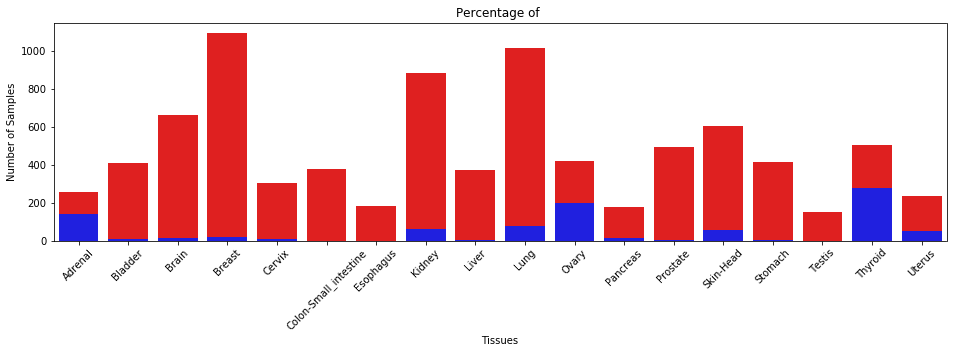

AR
BICALUTAMIDE
Prostate


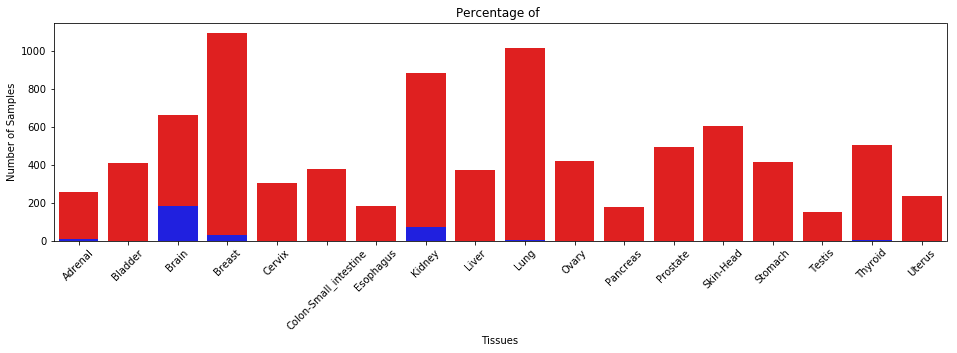

BRAF
DABRAFENIB
Skin-Head


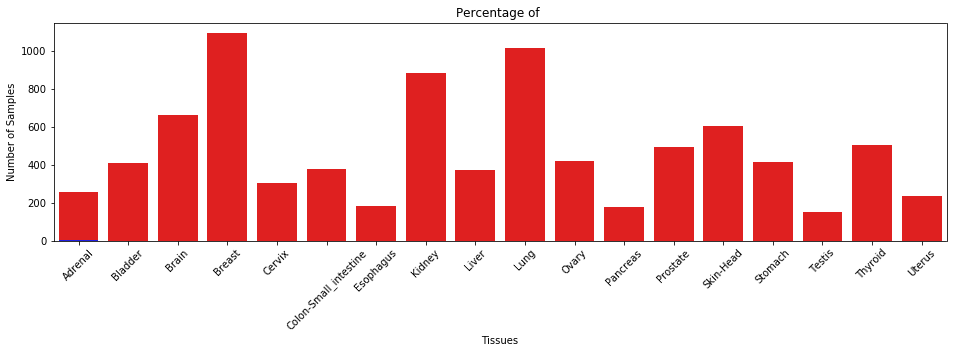

CD274
DURVALUMAB, ATEZOLIZUMAB, AVELUMAB
Skin-Head, Lung, Bladder


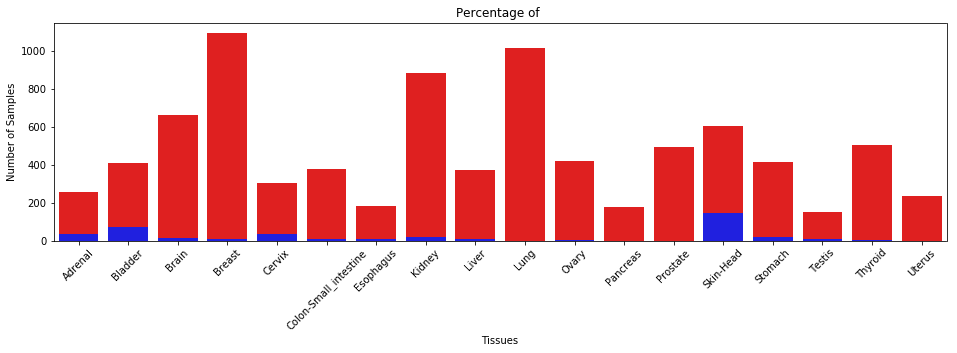

CDK4
PALBOCICLIB
Breast


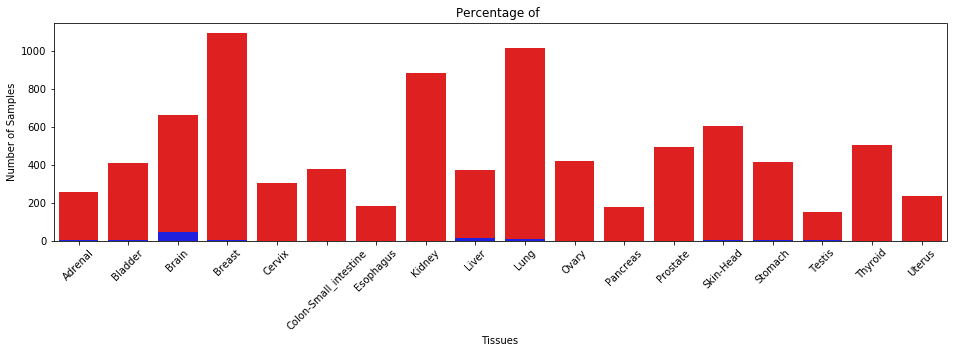

CDK6
PALBOCICLIB
Breast


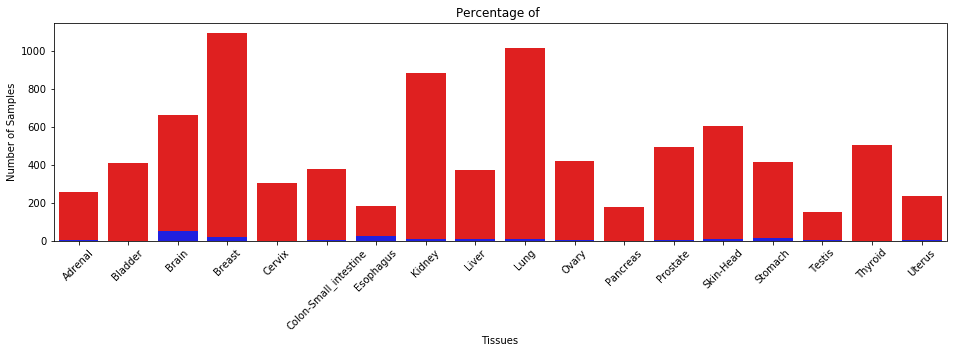

CSF1R
SUNITINIB MALATE, PAZOPANIB HYDROCHLORIDE
Stomach, Kidney, Pancreas


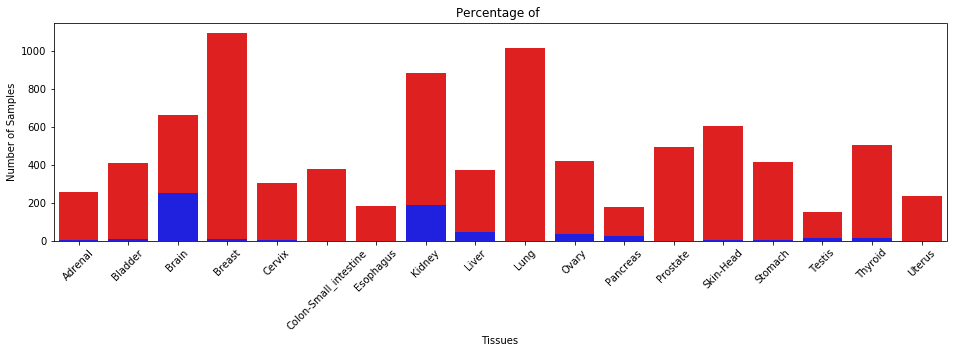

CTLA4
IPILIMUMAB
Skin-Head


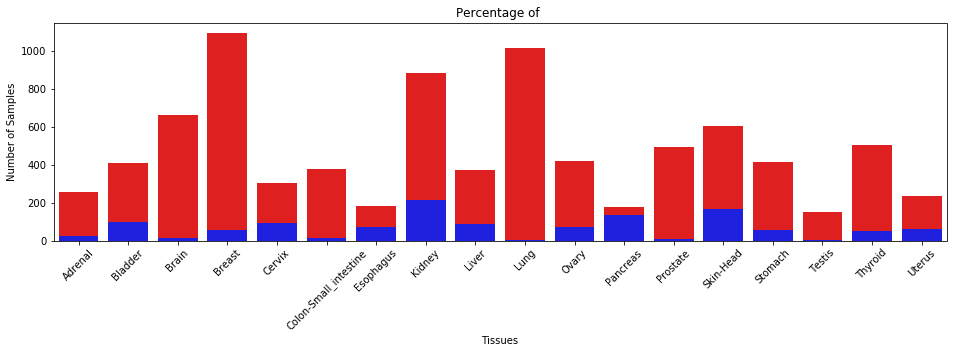

EGFR
ERLOTINIB HYDROCHLORIDE, CETUXIMAB, LAPATINIB, GEFITINIB, AFATINIB, PANITUMUMAB, NECITUMUMAB
Skin-Head, Lung, Breast, Colon-Small_intestine, Pancreas


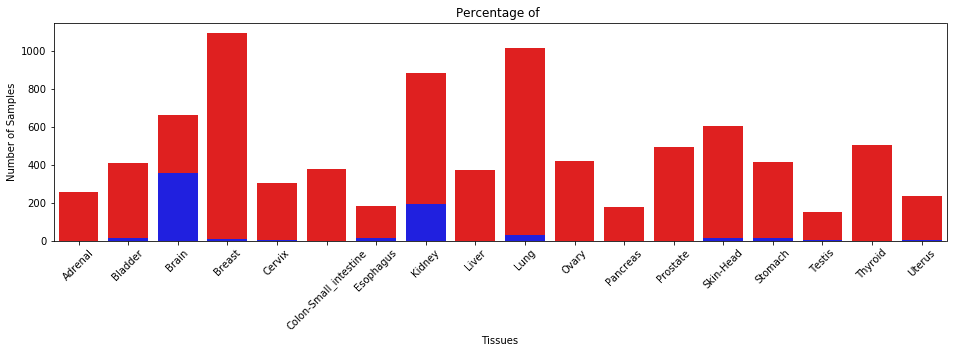

ERBB2
LAPATINIB, PERTUZUMAB, ADO-TRASTUZUMAB EMTANSINE, AFATINIB
Lung, Breast


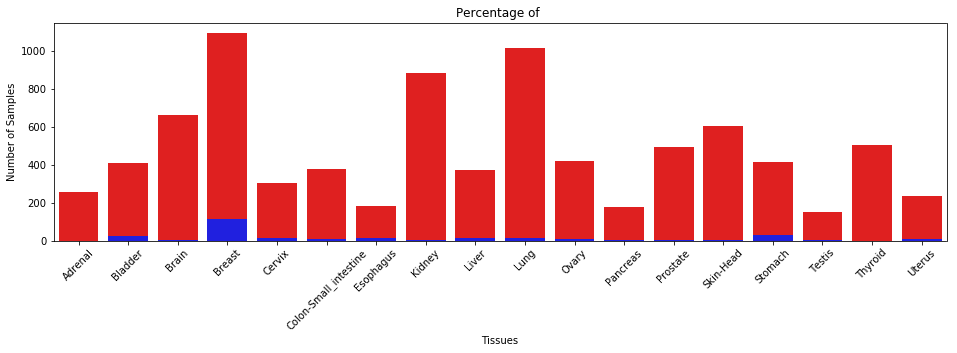

ESR1
TAMOXIFEN CITRATE
Ovary, Breast


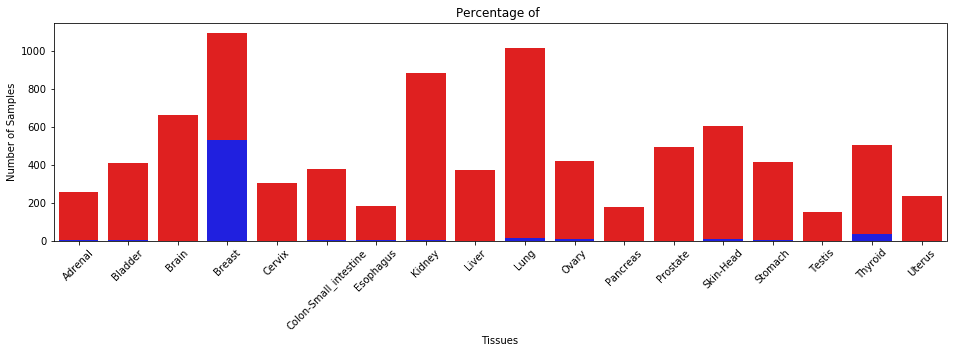

FLT1
CABOZANTINIB
Thyroid


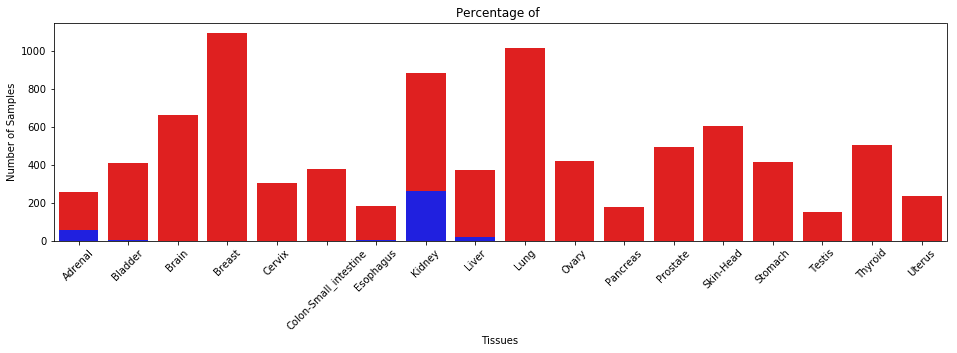

FLT3
CABOZANTINIB, SUNITINIB MALATE
Thyroid, Stomach, Kidney, Pancreas


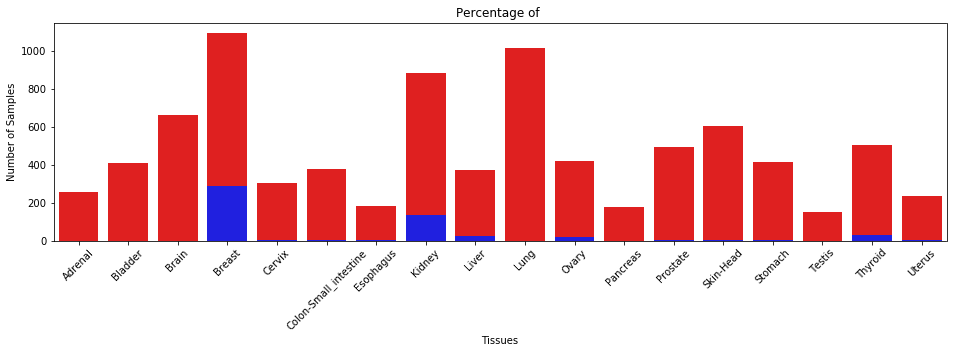

FLT4
SORAFENIB, SUNITINIB MALATE, AXITINIB, CABOZANTINIB
Thyroid, Stomach, Liver, Kidney, Pancreas


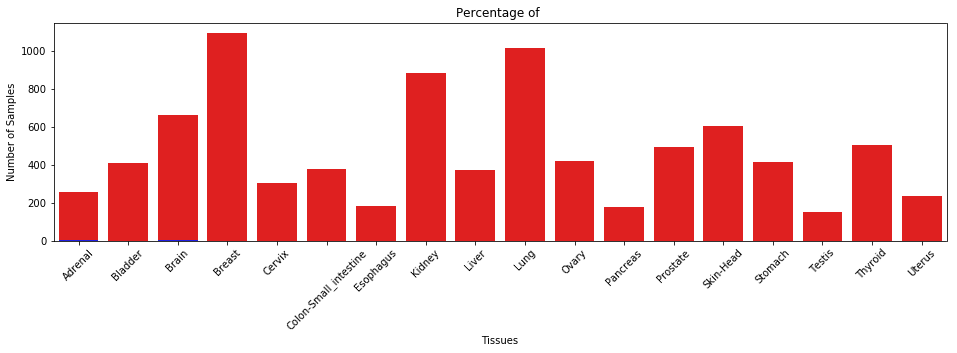

KDR
RAMUCIRUMAB
Stomach, Esophagus, Lung, Colon-Small_intestine


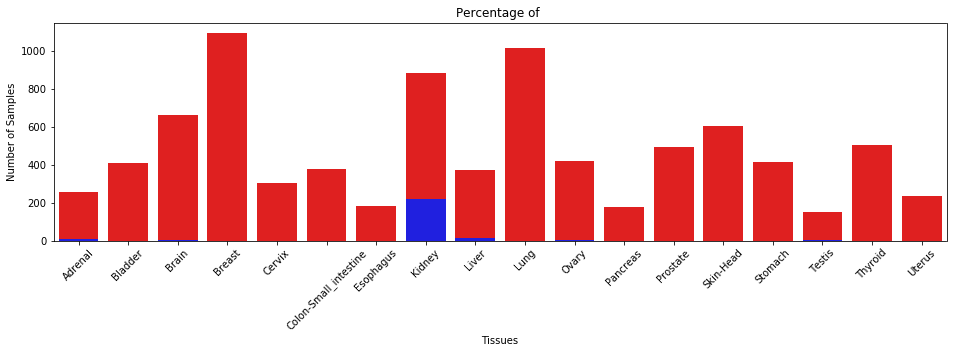

KIT
SORAFENIB, SUNITINIB MALATE, AXITINIB, CABOZANTINIB, PAZOPANIB HYDROCHLORIDE
Thyroid, Stomach, Liver, Kidney, Pancreas


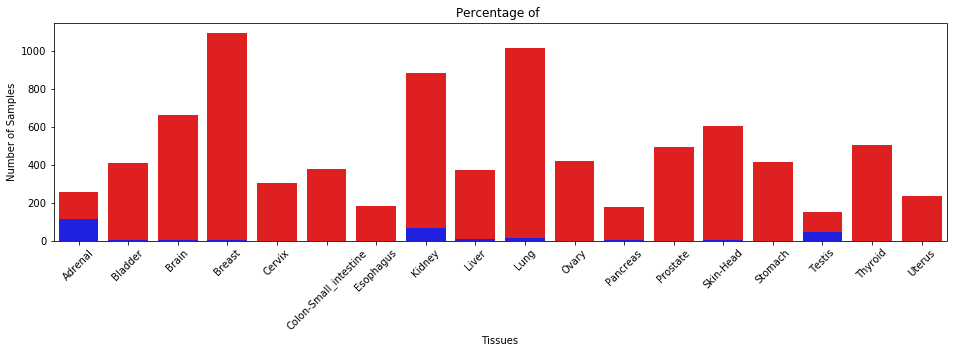

MAP2K2
TRAMETINIB
Skin-Head, Lung


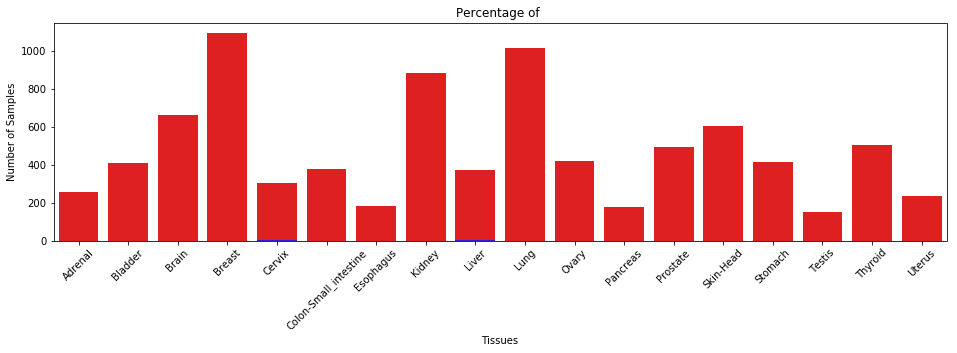

MET
CABOZANTINIB, CRIZOTINIB
Thyroid, Lung


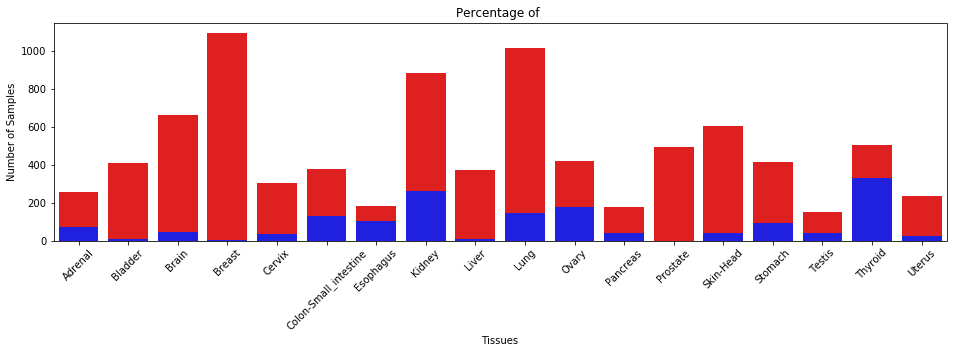

MMRN2
BEVACIZUMAB
Cervix, Ovary, Lung, Colon-Small_intestine, Kidney


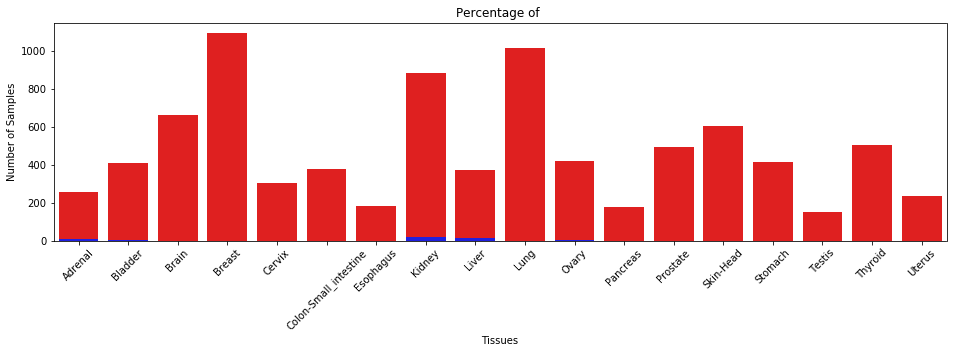

MTOR
TEMSIROLIMUS
Kidney


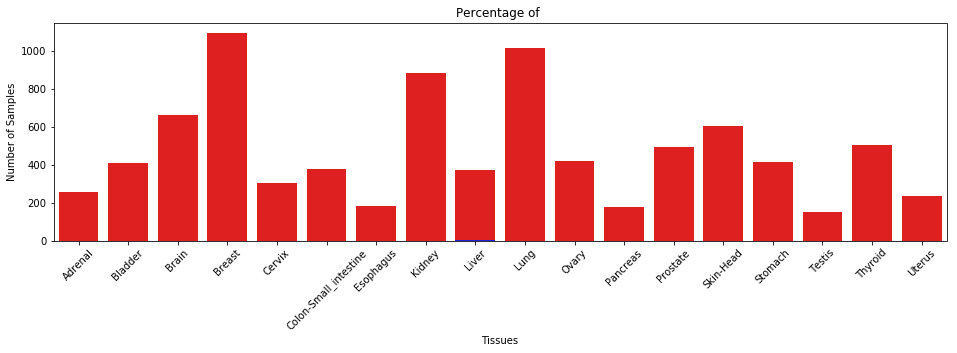

PARP1
RUCAPARIB, OLAPARIB
Ovary


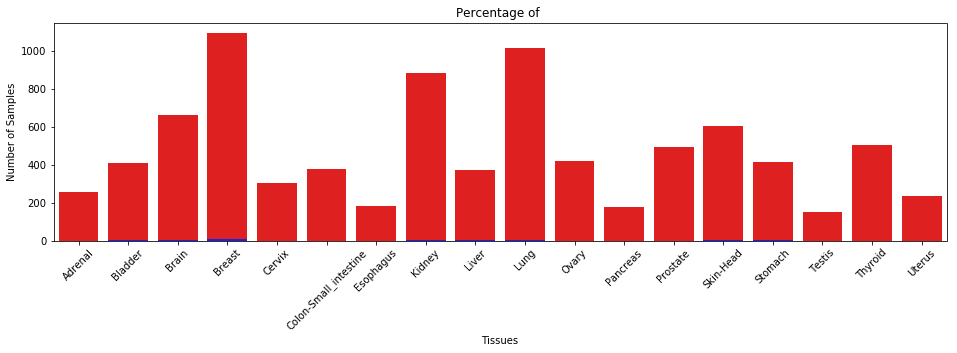

PARP2
RUCAPARIB, OLAPARIB
Ovary


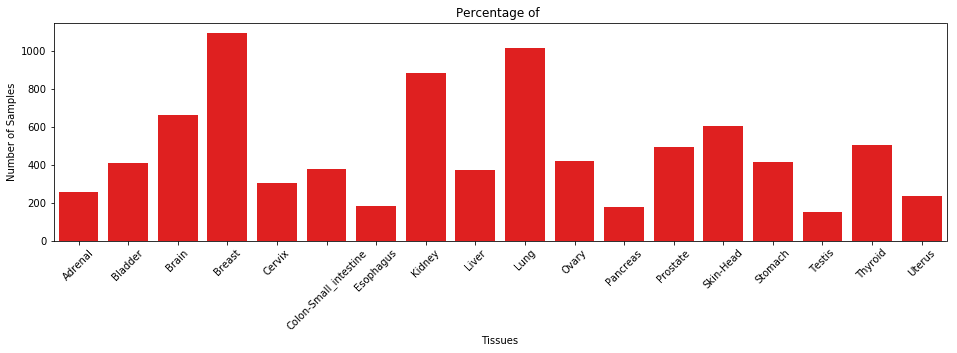

PDCD1
PEMBROLIZUMAB, NIVOLUMAB
Kidney, Skin-Head, Lung, Bladder, Colon-Small_intestine


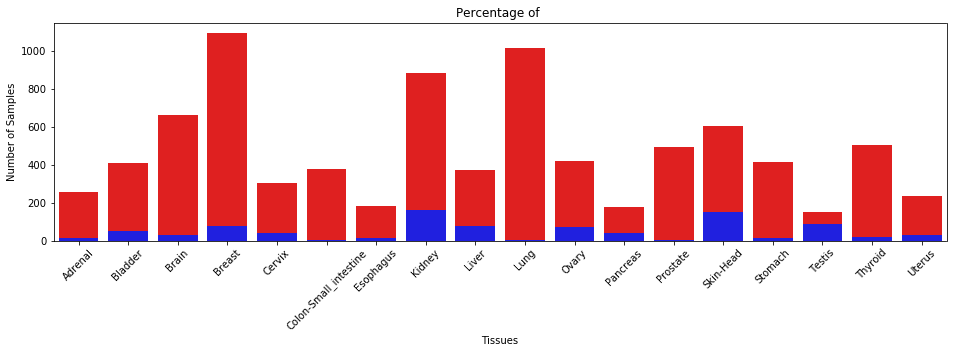

PDGFRA
PAZOPANIB HYDROCHLORIDE
Stomach, Kidney


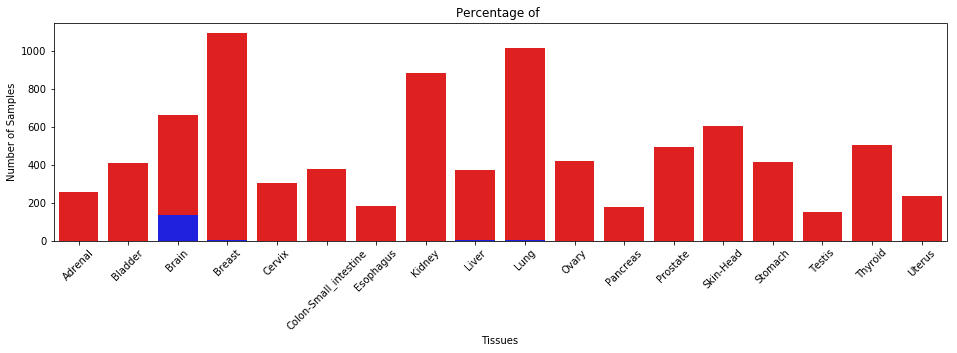

PDGFRB
PAZOPANIB HYDROCHLORIDE
Stomach, Kidney


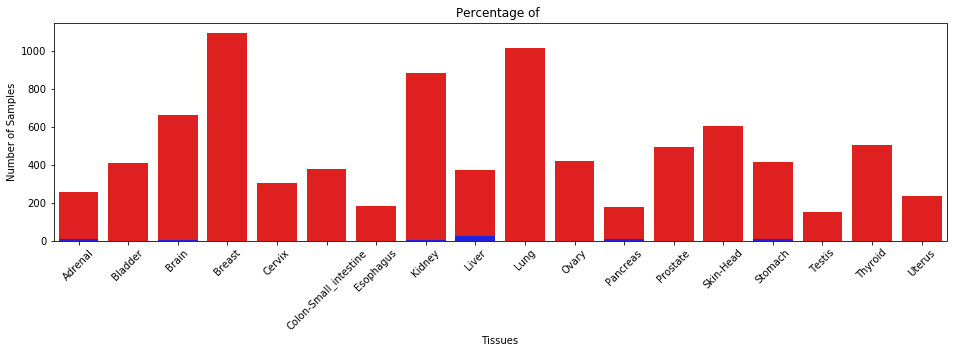

PDGFRL
SORAFENIB, SUNITINIB MALATE, AXITINIB
Thyroid, Stomach, Liver, Kidney, Pancreas


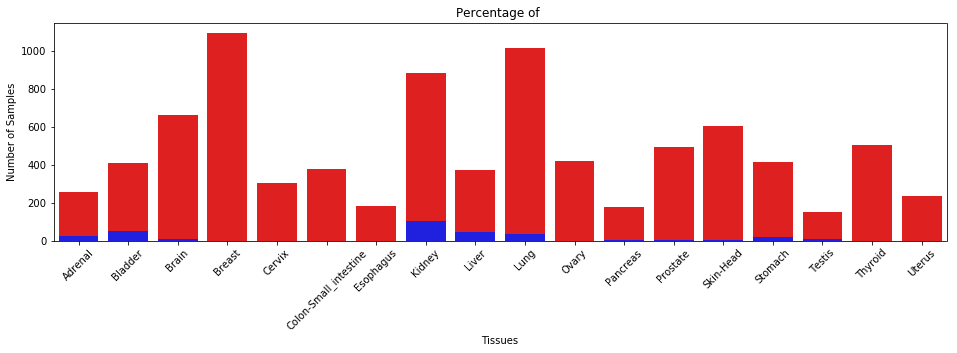

PPP4R3A
TRAMETINIB
Skin-Head, Lung


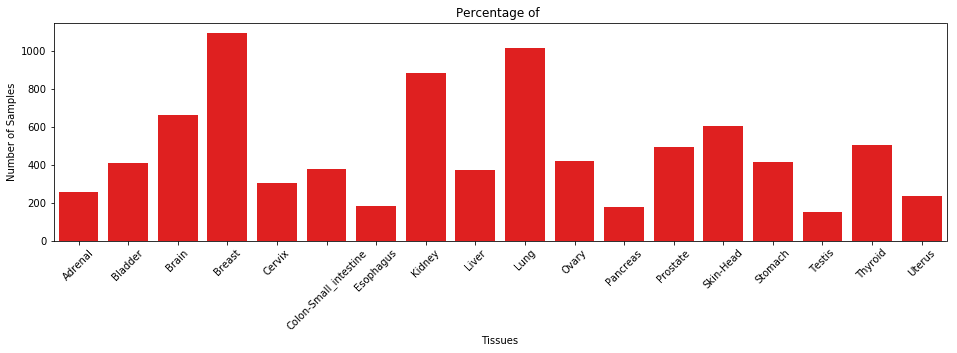

RAF1
SORAFENIB
Thyroid, Liver, Kidney


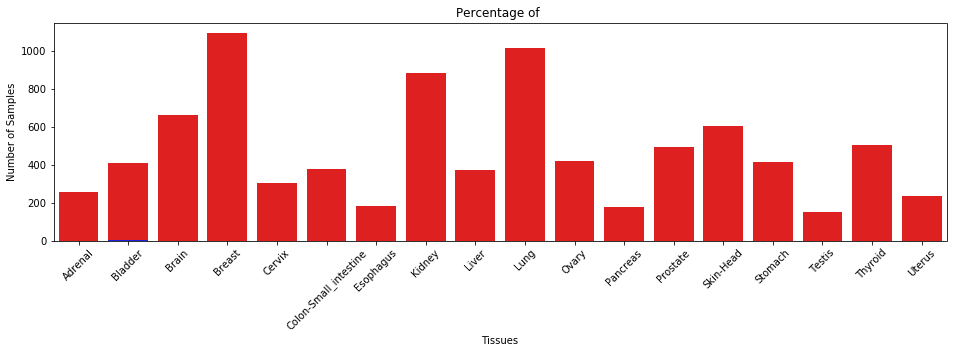

RET
CABOZANTINIB, SUNITINIB MALATE
Thyroid, Stomach, Kidney, Pancreas


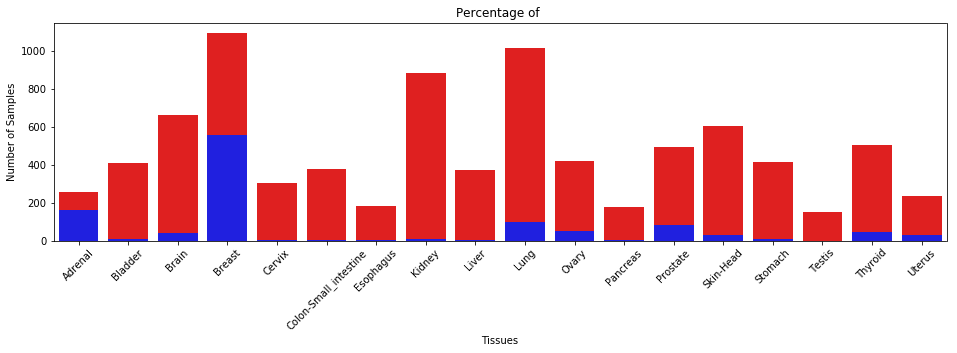

ROS1
CRIZOTINIB
Lung


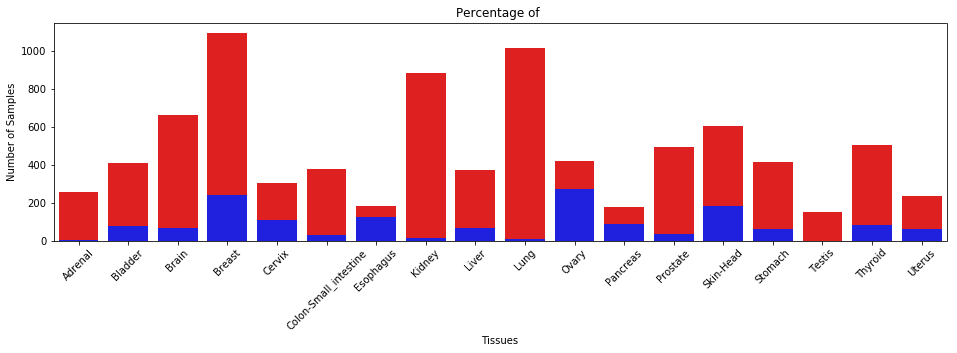

SMO
VISMODEGIB
Skin-Head


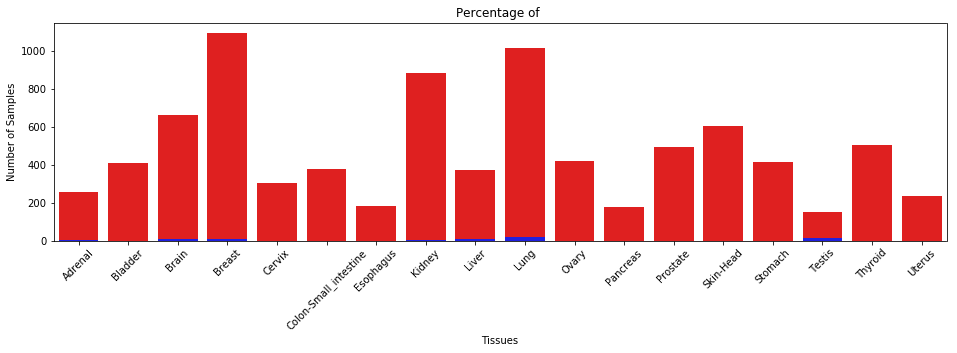

TNFSF11
DENOSUMAB
Prostate, Breast


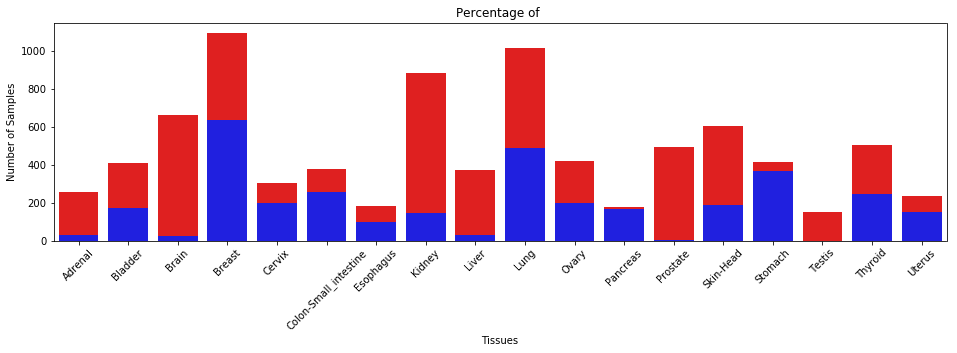

TOP2A
ETOPOSIDE
Testis, Lung


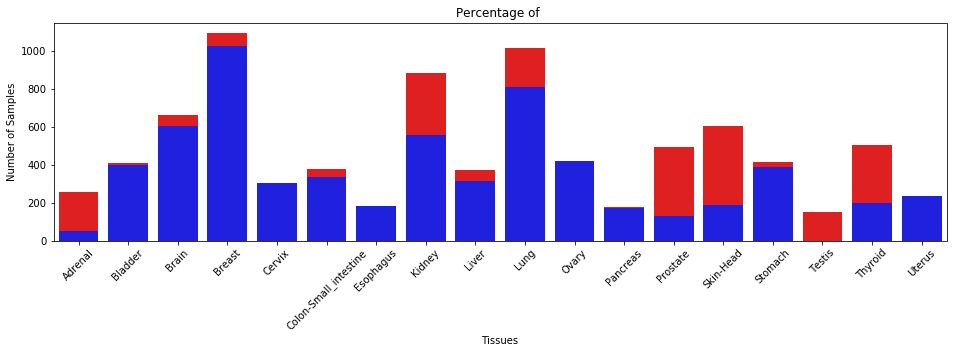

UBA2
DOXORUBICIN HYDROCHLORIDE
Thyroid, Stomach, Bladder, Brain, Breast, Ovary


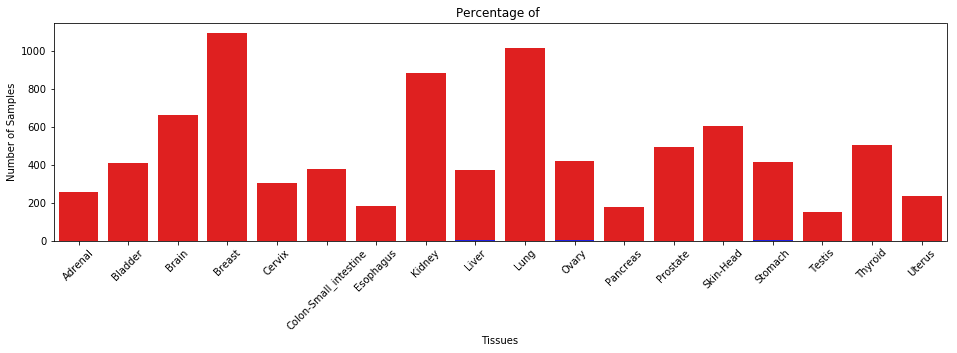

In [89]:
L2FC_VAL = 3

for gene in sorted(dgd.gene.unique()):
    info = defaultdict(list)
    print gene
    print ', '.join(gene_map[gene]['drug'])
    print ', '.join(gene_map[gene]['tissue'])
    for tissue in sorted(return_samples()):
        # Count num of TCGA samples that are significantly upregulated
        g_med = df.loc[gene][get_gtex_samples(tissue)].median()
        sig_vector = [1 if (np.log2(x+1) - np.log2(g_med+1)) > L2FC_VAL else 0 
                      for x in df.loc[gene][get_tumor_samples(tissue)]]
        info['count'].append(sum(sig_vector))
        info['total'].append(len(sig_vector))
        info['tissue'].append(tissue)
    
    # Plot background
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=info, x='tissue', y='total', color='red', ax=ax)
    # Plot overlay
    sns.barplot(data=info, x='tissue', y='count', color='blue', ax=ax)
    plt.title('Percentage of ')
    plt.ylabel('Number of Samples')
    plt.xlabel('Tissues')
    plt.xticks(rotation=45)
    display(f)
    plt.close(f)      

# Reduced Plot

Compact the above information into a single plot

In [146]:
# Log 2 Fold Change threshold
L2FC_VAL = 3

# Store plot information
info = defaultdict(list)

# Collect information across all tissues and genes
bar = ProgressBar()
for gene in bar(sorted(dgd.gene.unique())):
    for tissue in sorted(return_samples()):
        # Count num of TCGA samples that are significantly upregulated
        g_med = df.loc[gene][get_gtex_samples(tissue)].median()
        sig_vector = [1 if (np.log2(x+1) - np.log2(g_med+1)) > L2FC_VAL else 0 
                      for x in df.loc[gene][get_tumor_samples(tissue)]]
        # Save info
        info['Count'].append(sum(sig_vector))
        info['Total'].append(len(sig_vector))
        info['Fraction Overexpressed'].append(round(sum(sig_vector) / float(len(sig_vector)), 2))
        info['Tissue'].append(tissue)
        info['Gene'].append(gene)
        info['Target'].append('Target' if tissue in gene_map[gene]['tissue'] else 'Non-target') 
        info['Tissues'].append(', '.join(gene_map[gene]['tissue']))
        info['Drugs'].append(', '.join(x.lower().capitalize() for x in gene_map[gene]['drug']))

100% |########################################################################|


## Reduced Plot

    x = genes
    y = fraction / percentage
    size_index = total
    hue (color_index) = gene target


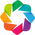

In [138]:
import holoviews as hv

hv.extension('bokeh')

Scale total for plotting

In [141]:
pdf = pd.DataFrame.from_dict(info)
pdf.head(2)

,Count,Drugs,Fraction Overexpressed,Gene,Target,Tissue,Tissues,Total
0,138,"ALECTINIB HYDROCHLORIDE, CRIZOTINIB",0.54,ALK,Non-target,Adrenal,Lung,254
1,8,"ALECTINIB HYDROCHLORIDE, CRIZOTINIB",0.02,ALK,Non-target,Bladder,Lung,407


In [142]:
pdf['total_scale'] = (pdf.Total - pdf.Total.min()) / (pdf.Total.max() - pdf.Total.min())

In [143]:
s = hv.Scatter(data=pdf, kdims=['Gene'], 
               vdims=['Fraction Overexpressed', 'Total', 'Tissue', 'Target', 'Tissues', 'Drugs'], 
               group='Fraction of Samples with Significant Gene Upregulation (l2fc > 3)')

make directory to save plots 

In [144]:
mkdir_p('html')

plot

In [145]:
%%opts Scatter [width=900 height=500]
%%opts Scatter [color_index='Target' size_index='Total' scaling_factor=.025]
%%opts Scatter [tools=['hover']]
%%opts Scatter [legend_position='left' xrotation=45]
%%opts Scatter (cmap='Set1')
%%output filename='html/fraction-samples-upregulate-gene.html'
s

:Scatter   [Gene]   (Fraction Overexpressed,Total,Tissue,Target,Tissues,Drugs)

## Seaborn

Seaborn isn't interactive, but has jitter

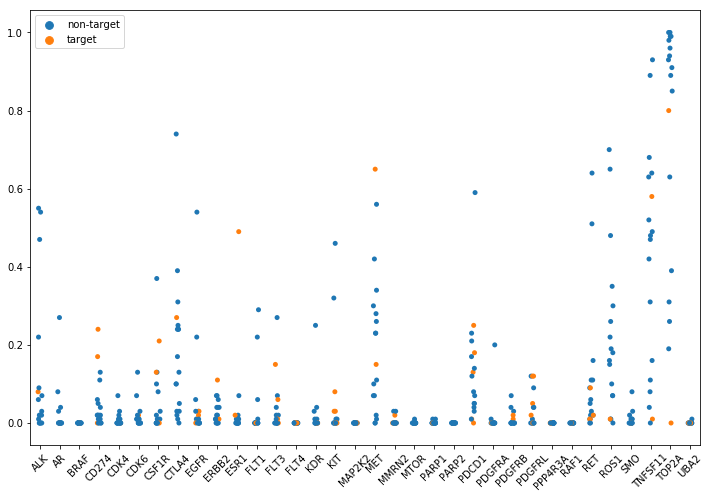

In [117]:
f, ax = plt.subplots(figsize=(12, 8))
sns.stripplot(data=info, x='gene', y='percent', hue='target', ax=ax, jitter=True)
plt.xticks(rotation=45)
display(f)
plt.close()